# BANK CUSTOMER CHURN PREDICTION SYSTEM USING ML


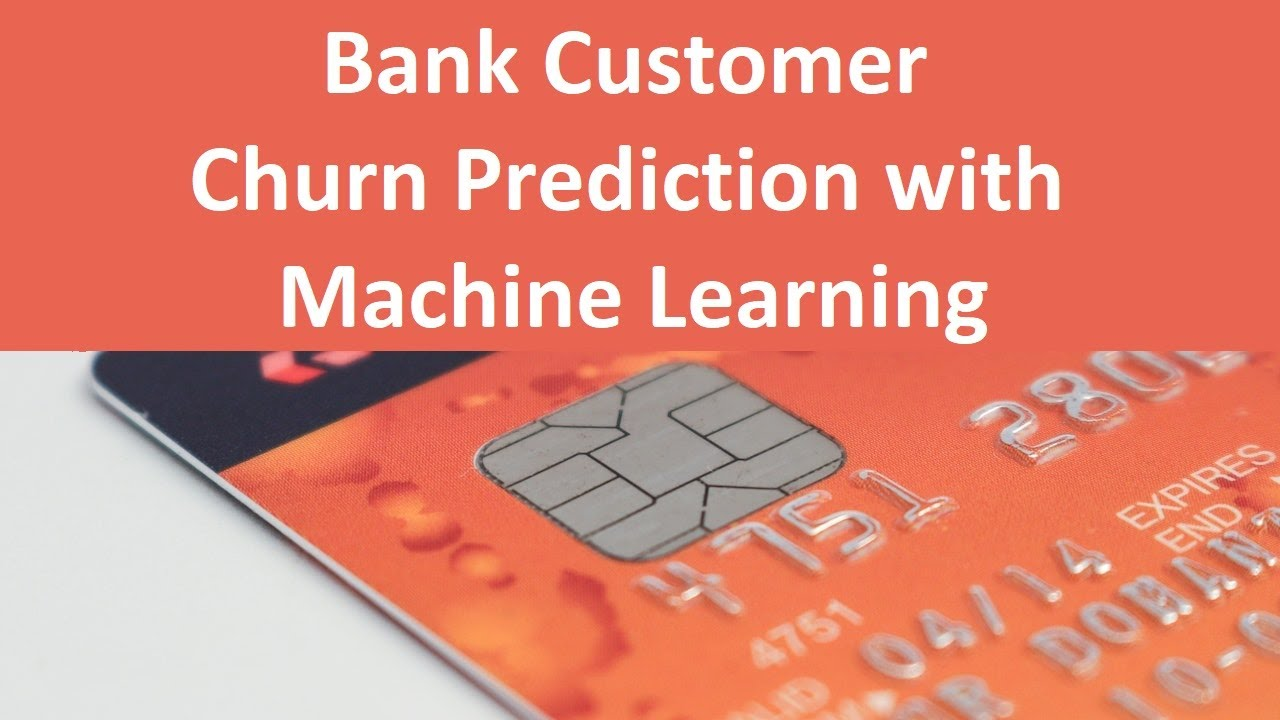

# INTRODUCTION

Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service. For many companies, this is an important prediction. This is because acquiring new customers often costs more than retaining existing ones. Once you’ve identified customers at risk of churn, you need to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying.

Customers have different behaviors and preferences, and reasons for cancelling their subscriptions. Therefore, it is important to actively communicate with each of them to keep them on your customer list. You need to know which marketing activities are most effective for individual customers and when they are most effective.

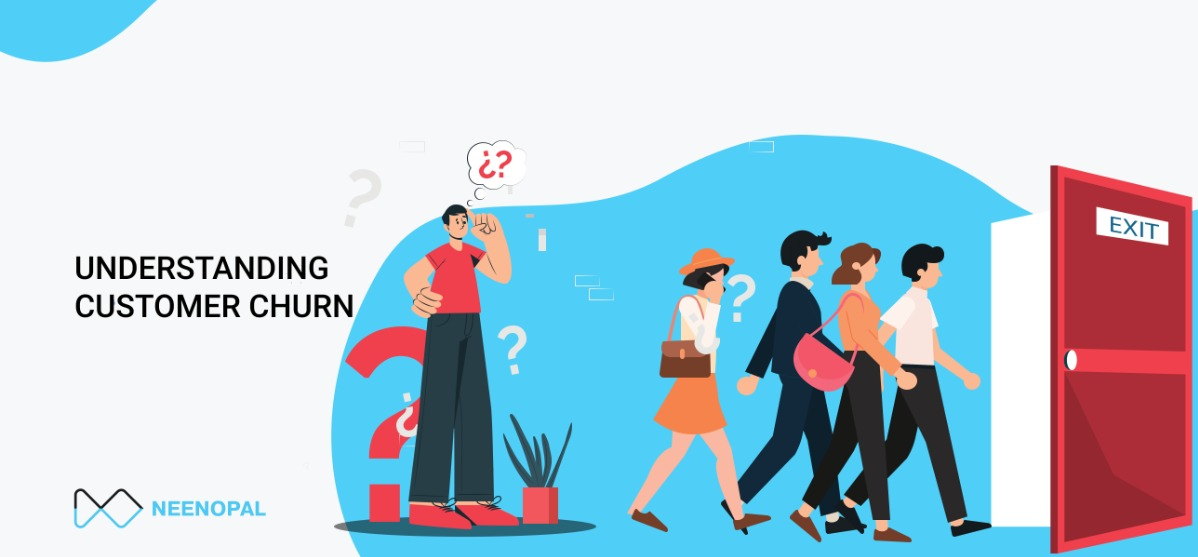

# How does Customer Churn Prediction Work?

We first have to do some Exploratory Data Analysis in the Dataset, then fit the dataset into Machine Learning Classification Algorithm and choose the best Algorithm for the Bank Customer Churn Dataset.

# ABOUT THE DATASET

This dataset is for ABC Multistate bank with following columns:

✨ customer_id: unused variable. -->Tells about ID of the customer

✨ credit_score: used as input. --> Credit Score of the customer

✨ country: used as input. --> Country of Customer

✨gender: used as input. --> Gender of customer

✨ age: used as input. --> Age of customer

✨ tenure: used as input. --> Tenure of customer

✨ balance: used as input. --> Bank balance of the customer

✨ products_number: used as input. --> how much products the customer have

✨ credit_card: used as input. --> Customer has a credit card or not

✨ active_member: used as input. --> Tells the customer is active member or not

✨ estimated_salary: used as input. --> Estimated Salary of Customer

✨ churn: used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix

In [60]:
df=pd.read_csv("Bank_Churn.csv")

# BASIC UNDERSTANDING OF DATA

In [61]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
df.shape

(10000, 14)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [65]:
df.describe(include=object)

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [66]:
df.isnull().sum()/len(df)*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [67]:
df.duplicated().sum()/len(df*100)

0.0

In [68]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA PREPROCESSING

In [69]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
# 1. droping irrelevant features of data 

In [71]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [72]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [73]:
#2 changing name of exited feature as churned

In [74]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [75]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EXPLORATORY DATA ANALYSIS 

# 1) Visualizing Churned Feature:

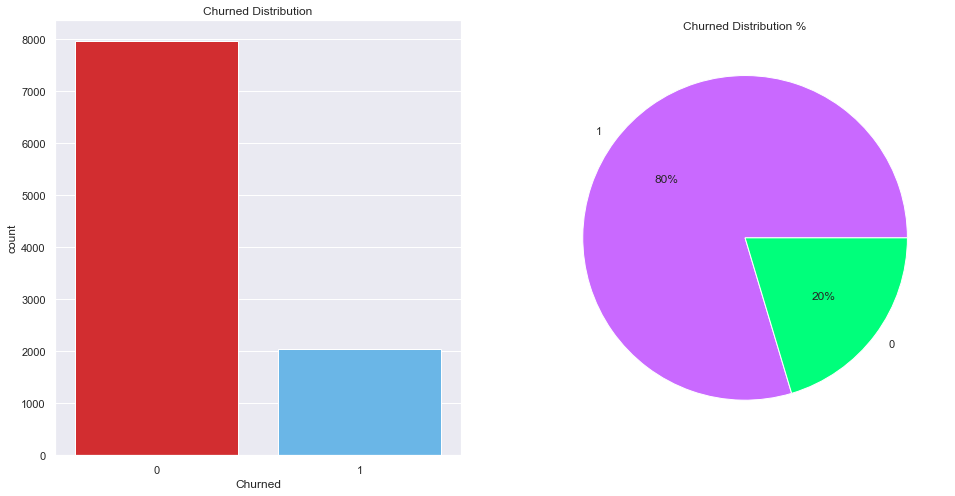

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Churned Distribution")
sns.countplot(df['Churned'],palette=['#ED1216','#55BBFC'])

plt.subplot(1,2,2)
plt.title("Churned Distribution %")
plt.pie(df['Churned'].value_counts(),colors=['#C969FF','#00FF7B'],labels=df['Churned'].unique(),autopct="%0.0f%%");



# 2) churned as per gender

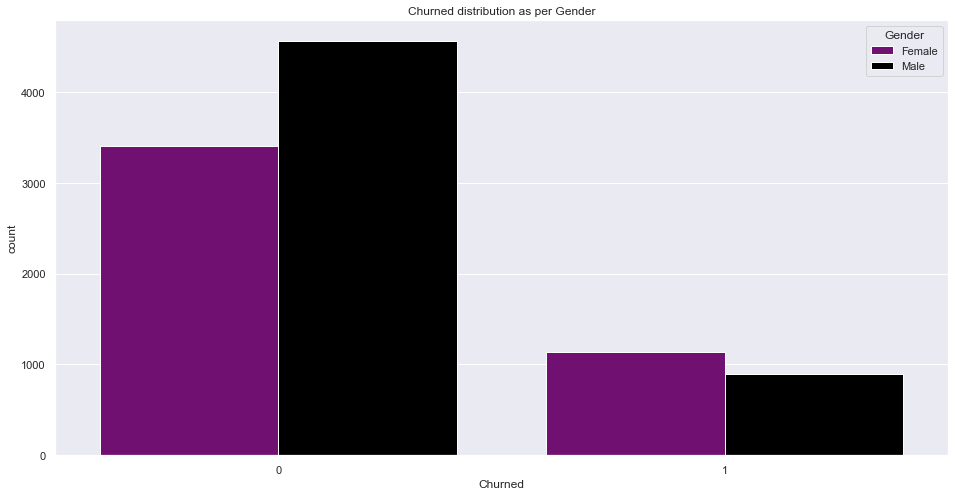

In [79]:
plt.figure(figsize=(16,8))
plt.title("Churned distribution as per Gender")
sns.countplot(df['Churned'],hue='Gender',palette=['purple','black'],data=df);

# 3) churned as per person has a credit card or not

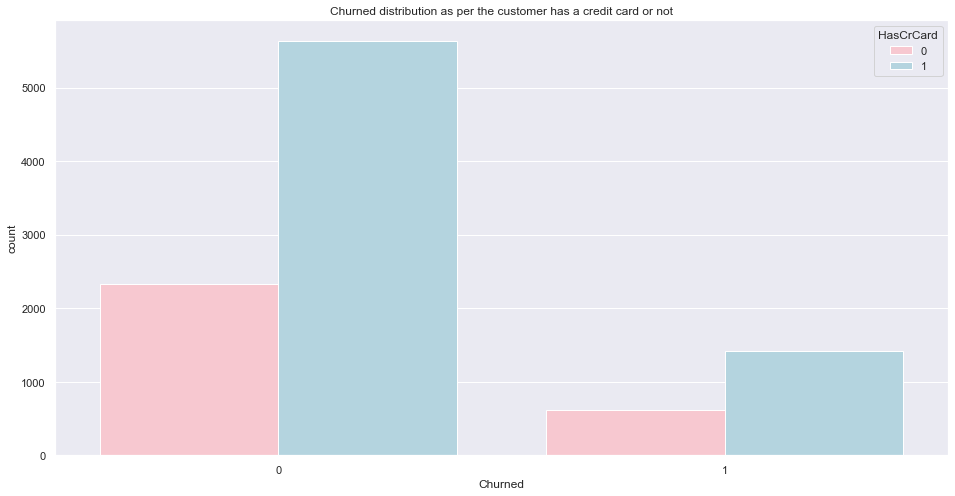

In [81]:
plt.figure(figsize=(16,8))
plt.title("Churned distribution as per the customer has a credit card or not")
sns.countplot(df['Churned'],hue='HasCrCard',palette=['pink','lightblue'],data=df);

# 4) Churned distribution as per the customer is a Active member or not

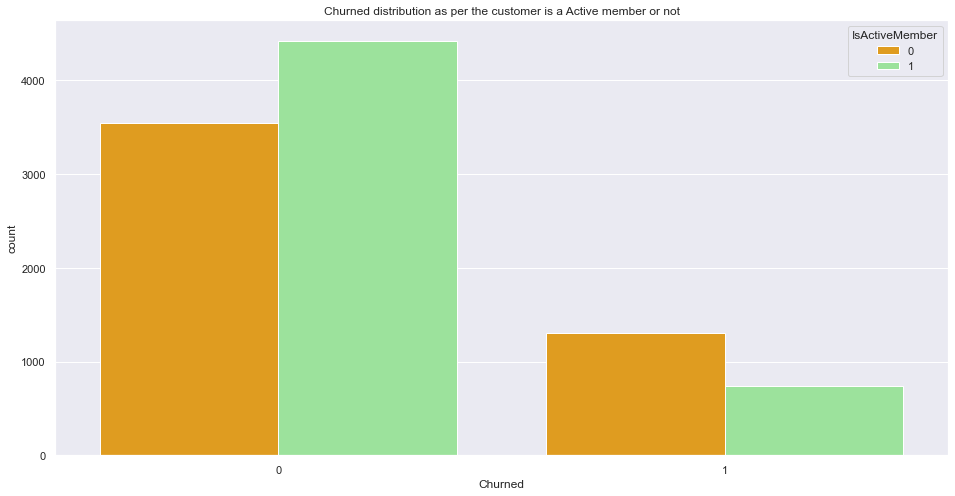

In [83]:
plt.figure(figsize=(16,8))
plt.title("Churned distribution as per the customer is a Active member or not")
sns.countplot(df['Churned'],hue='IsActiveMember',palette=['orange','lightgreen'],data=df);

# 5)Churned distribution as per the customer NumOfProducts

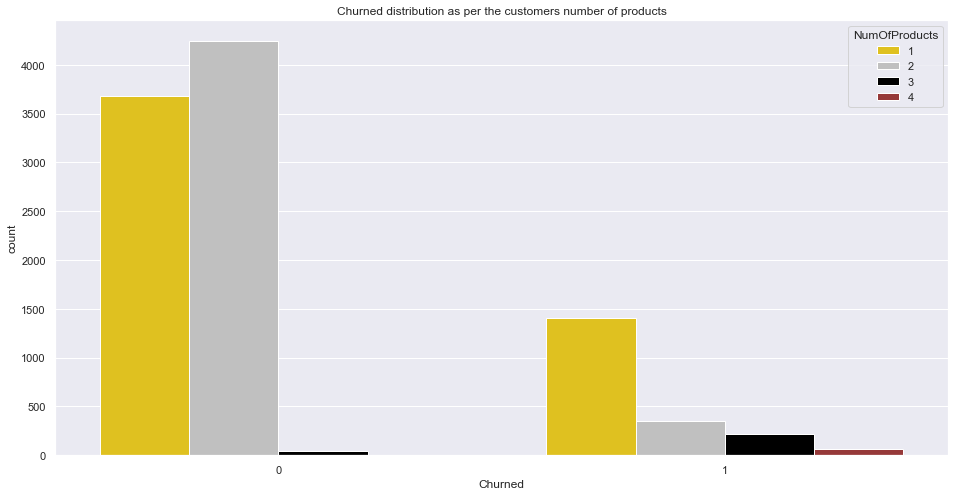

In [85]:
plt.figure(figsize=(16,8))
plt.title("Churned distribution as per the customers number of products")
sns.countplot(df['Churned'],hue='NumOfProducts',palette=['Gold','silver','black','brown'],data=df);

# 6) Churned distribution as per the customer Tenure

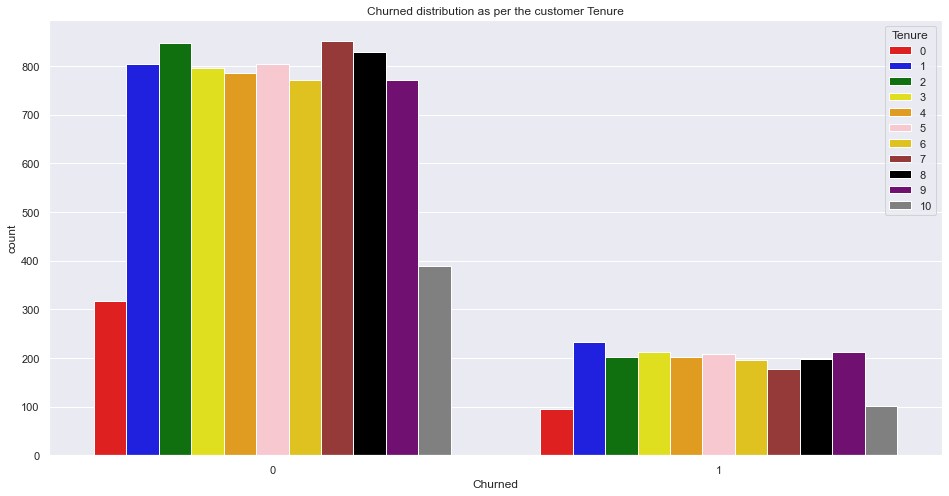

In [87]:
plt.figure(figsize=(16,8))
plt.title("Churned distribution as per the customer Tenure")
sns.countplot(df['Churned'],hue='Tenure',palette=['red','blue','green','yellow','orange','pink','gold','brown','black','purple','grey'],data=df);

# 7) Churned distribution as per Geography

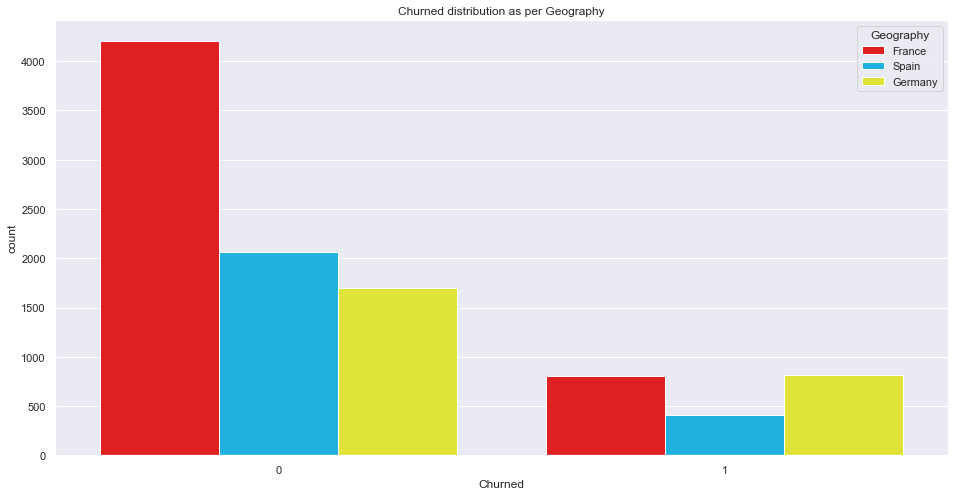

In [89]:
plt.figure(figsize=(16,8))
plt.title("Churned distribution as per Geography")
sns.countplot(df['Churned'],hue='Geography',palette=['red','#00C3FF','#FAFF1B'],data=df);

# 8) Age distribution as per churned Customer

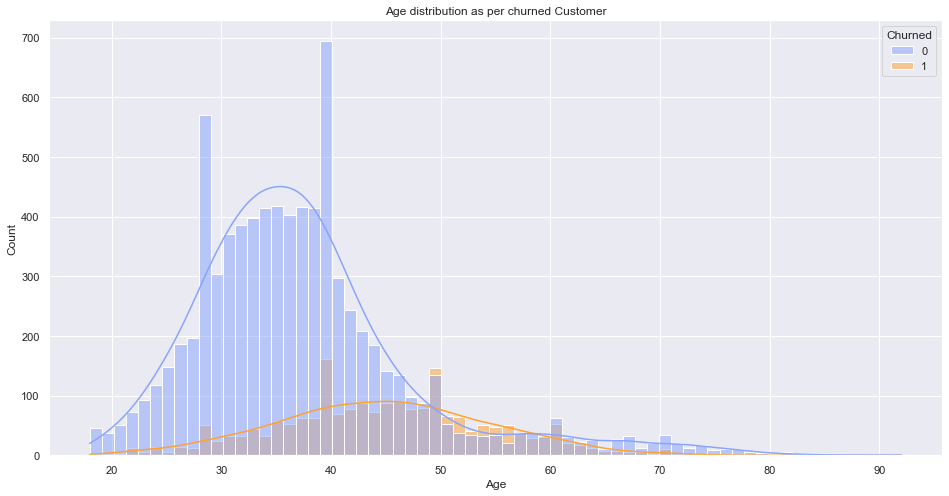

In [91]:
plt.figure(figsize=(16,8))
plt.title("Age distribution as per churned Customer")
sns.histplot(x='Age', hue='Churned',palette=['#88A4FD','#FFA131'],kde=True,data=df);

# 9)Churned distribution as per Customer Credit Score

<AxesSubplot:title={'center':'Churned distribution as per Customer Credit Score'}, xlabel='CreditScore', ylabel='Count'>

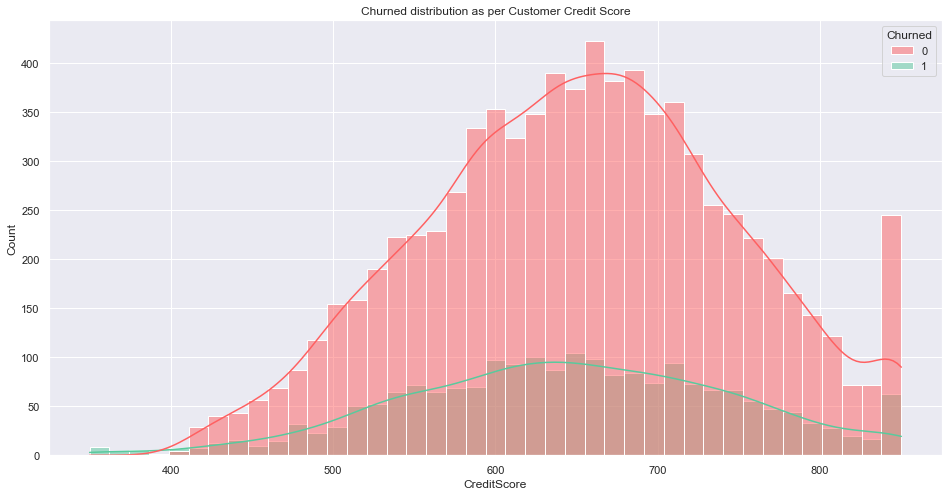

In [93]:
plt.figure(figsize=(16,8))
plt.title("Churned distribution as per Customer Credit Score")
sns.histplot(x='CreditScore',hue=df['Churned'],palette=['#FF6061','#59CA9D'],kde=True,data=df)

# 10) Churned distribution as per Customer Estimated salary

<AxesSubplot:title={'center':'Churned distribution as per Customer Estimated salary'}, xlabel='Churned', ylabel='EstimatedSalary'>

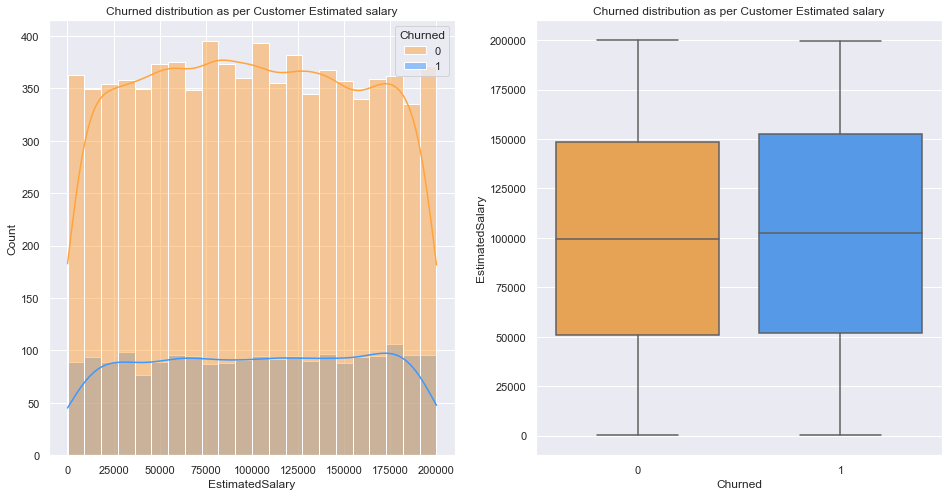

In [95]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Churned distribution as per Customer Estimated salary")
sns.histplot(x='EstimatedSalary',hue=df['Churned'],palette=['#FFA43D','#3D98FF'],kde=True,data=df)

plt.subplot(1,2,2)
plt.title("Churned distribution as per Customer Estimated salary")
sns.boxplot(df['Churned'],df['EstimatedSalary'],palette=['#FFA43D','#3D98FF'],data=df)

In [96]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 11) Churned distribution as per Customer Bank Balance

<AxesSubplot:title={'center':'Churned distribution as per Customer Balance'}, xlabel='Churned', ylabel='Balance'>

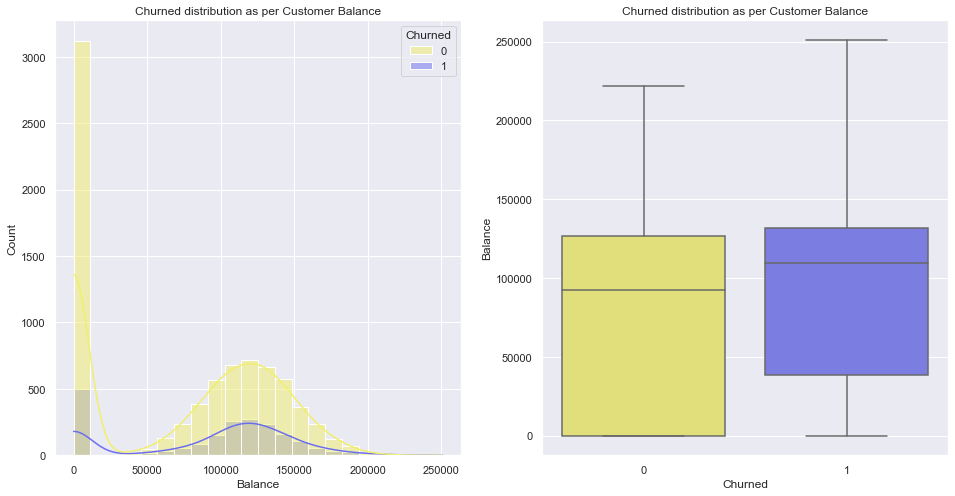

In [98]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Churned distribution as per Customer Balance")
sns.histplot(x='Balance',hue=df['Churned'],palette=['#F1EF6B','#6B6DF1'],kde=True,data=df)

plt.subplot(1,2,2)
plt.title("Churned distribution as per Customer Balance")
sns.boxplot(df['Churned'],df['Balance'],palette=['#F1EF6B','#6B6DF1'],data=df)

# NOW APPLY ONE HOT ENCODING ON CATEGORICAL COLUMNS

In [99]:
df=pd.get_dummies(columns=["Geography","Gender","NumOfProducts"],data=df)

In [100]:
df

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,1,0,113931.57,1,1,0,0,1,0,0,0,1,0
3,699,39,1,0.00,0,0,93826.63,0,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,1,0,96270.64,0,1,0,0,0,1,0,1,0,0
9996,516,35,10,57369.61,1,1,101699.77,0,1,0,0,0,1,1,0,0,0
9997,709,36,7,0.00,0,1,42085.58,1,1,0,0,1,0,1,0,0,0
9998,772,42,3,75075.31,1,0,92888.52,1,0,1,0,0,1,0,1,0,0


# Checking Skewness of Continous Features

In [101]:
print("The skewness of creditscore is :",df['CreditScore'].skew())
print("The skewness of Age is :",df['Age'].skew())
print("The skewness of EstimatedSalary is :",df['EstimatedSalary'].skew())

The skewness of creditscore is : -0.07160660820092675
The skewness of Age is : 1.0113202630234552
The skewness of EstimatedSalary is : 0.0020853576615585162


AS you clearly see that Age columns skewness is very high and highly right-skewed which result in that it contain high amount of outliers.

so we transform Age feature

# Performing Log Transformation on Age Column.

In [102]:
old_age = df["Age"] # store Age feature in another variable for comparing it after transformation

In [103]:
df["Age"] = np.log(df["Age"])  # use log transformation for creation for log normal distribution for age columns 

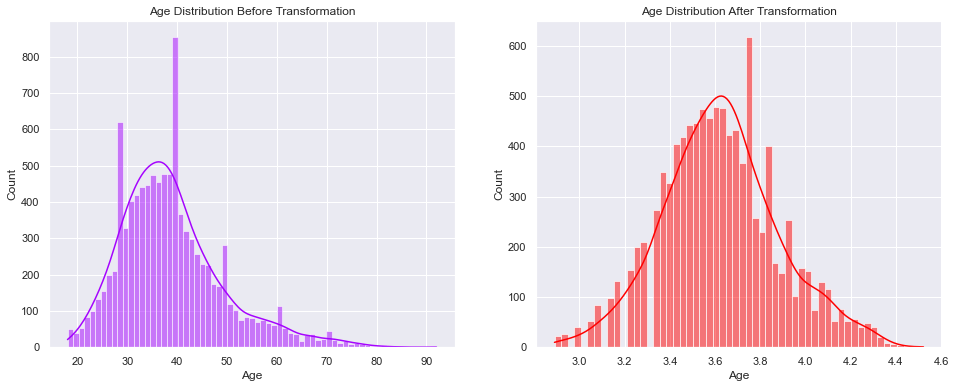

In [104]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="#A503FF", kde=True)
plt.title("Age Distribution Before Transformation")

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="red", kde=True)
plt.title("Age Distribution After Transformation");

# Model Building 

# Segregating Features & Labels for Model Training

In [173]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

# Splitting Data For Model Training & Testing.

In [174]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [175]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [108]:
dt=DecisionTreeClassifier()

In [109]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
y_pred= dt.predict(x_test)

In [111]:
y_train_pred=dt.predict(x_train)

In [112]:
accuracy_score(y_test,y_pred)

0.783

In [113]:
accuracy_score(y_train,y_train_pred)

1.0

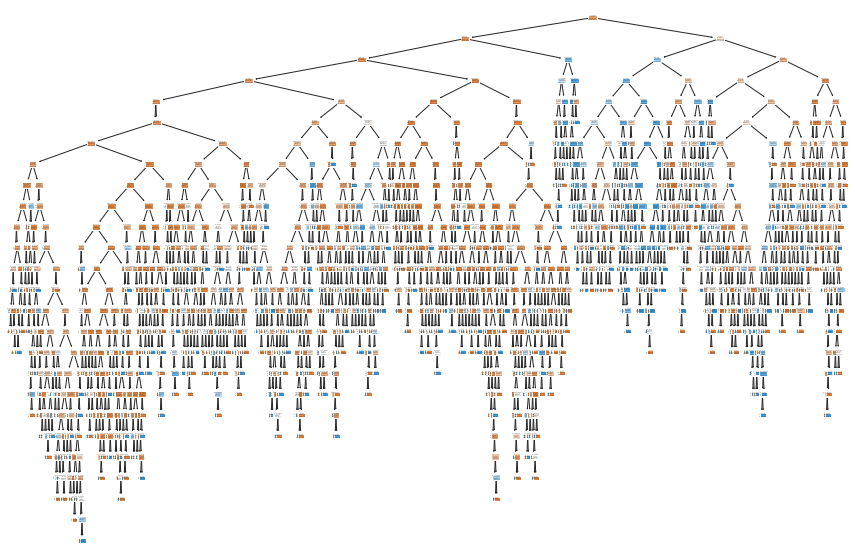

In [114]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()

# overfitting rescue by haperparameter tunning

In [244]:
grid_param ={
    'criterion':['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter':['best','random']
}

In [245]:
grid_search= GridSearchCV(estimator=dt,
                         param_grid= grid_param,
                         cv=5,
                         n_jobs=-1)

In [246]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [248]:
best_parameters= grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 9, 'splitter': 'random'}


In [249]:
grid_search.best_score_

0.8561249999999999

In [250]:
dt= DecisionTreeClassifier(**best_parameters)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=7,
                       min_samples_split=9, splitter='random')

In [252]:
dt.score(x_test,y_test)

0.861

In [253]:
y_pred= dt.predict(x_test)

In [255]:
y_pred_train=dt.predict(x_train)

# Model Evaluation using Accuracy_score

In [268]:
accuracy_score(y_pred,y_test)

0.861

In [269]:
accuracy_score(y_pred_train,y_train)

0.85475

# Model Evaluation using Different Metric Values

In [85]:
print("F1 Score of the Model is :",f1_score(y_pred,y_test,average="micro"))
print("Recall Score of the Model is :",recall_score(y_pred,y_test,average="micro"))
print("Precision Score of the Model is :",precision_score(y_pred,y_test,average="micro"))

F1 Score of the Model is : 0.865
Recall Score of the Model is : 0.865
Precision Score of the Model is : 0.865


# Calculating and Visualizing the feature importances

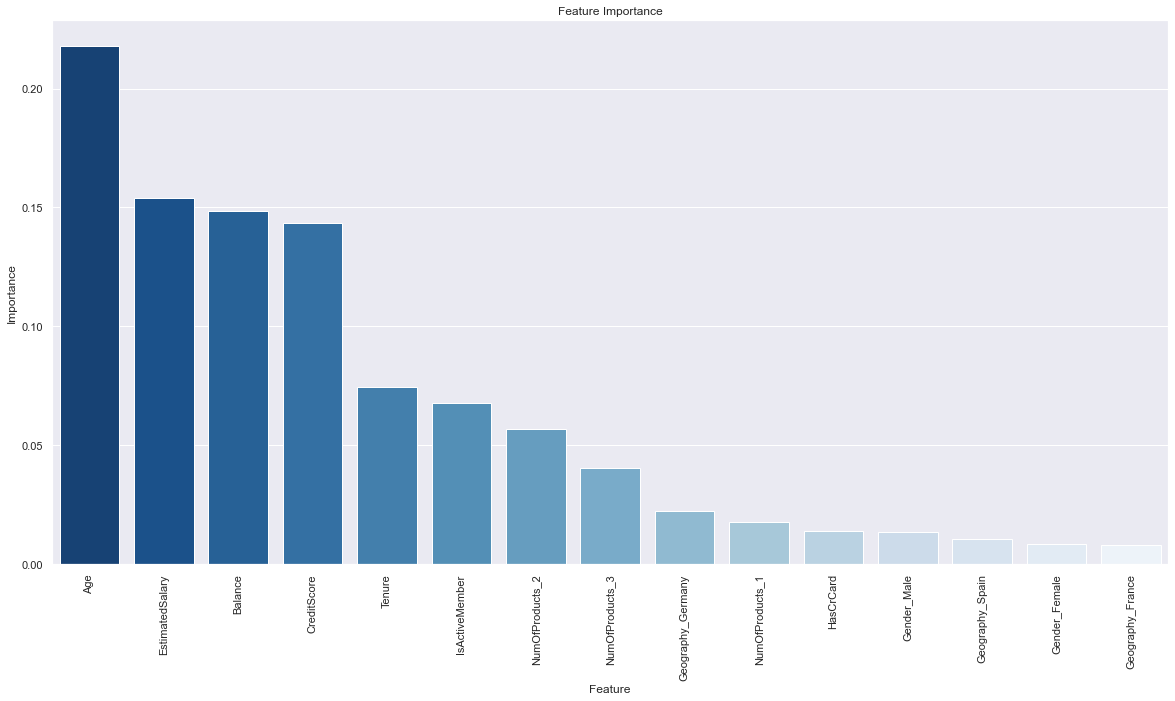

In [116]:
importances = dt.feature_importances_

# Sort the feature importances in descending order and take the top 10
indices = np.argsort(importances)[::-1]
columns = x_train.columns.values[indices[:15]]
values = importances[indices][:15]

# Create a bar plot of the feature importances
plt.figure(figsize=(20, 10))
sns.barplot(x=columns, y=values, palette='Blues_r')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# Model Building For Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rd=RandomForestClassifier()

In [158]:
rd.fit(x_train,y_train)

RandomForestClassifier()

In [159]:
y_pred=rd.predict(x_test)

In [160]:
y_pred_train=rd.predict(x_train)

In [161]:
accuracy_score(y_pred,y_test)

0.865

In [162]:
accuracy_score(y_pred_train,y_train)

1.0

# Hyperparameter Tunning for Random Forest Model

In [150]:
rd=RandomForestClassifier()

In [151]:
param_grid = {"max_depth":[2,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [20,30,50,50],
              "criterion":["gini","entropy"]}

In [152]:
grid_search = GridSearchCV(rd, param_grid, cv=5, n_jobs=-1)

In [155]:
grid_search.fit(x_train,y_train)

In [142]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=4,
                       n_estimators=20)

 The best score across ALL searched params:
 0.8636250000000001

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 20}


In [143]:
best_parameters=grid_search.best_params_

In [144]:
rd= RandomForestClassifier(**best_parameters)
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [145]:
y_pred= dt.predict(x_test)

In [146]:
y_pred_train=dt.predict(x_train)

In [147]:
accuracy_score(y_pred,y_test)

0.781

In [148]:
print("F1 Score of the Model is :",f1_score(y_pred,y_test,average="micro"))
print("Recall Score of the Model is :",recall_score(y_pred,y_test,average="micro"))
print("Precision Score of the Model is :",precision_score(y_pred,y_test,average="micro"))

F1 Score of the Model is : 0.7810000000000001
Recall Score of the Model is : 0.781
Precision Score of the Model is : 0.781


# Calculating and Visualizing the feature importances

In [186]:
Feature_Importance = pd.DataFrame({"Feature Name":x_train.columns,"Importance":rd.feature_importances_})

In [190]:
Feature= Feature_Importance.sort_values(by='Importance',ascending=False)

In [191]:
Feature

,Feature Name,Importance
1,Age,0.230075
6,EstimatedSalary,0.142103
3,Balance,0.141939
0,CreditScore,0.139319
2,Tenure,0.081396
13,NumOfProducts_2,0.062602
5,IsActiveMember,0.041325
14,NumOfProducts_3,0.038509
12,NumOfProducts_1,0.031080
8,Geography_Germany,0.022150


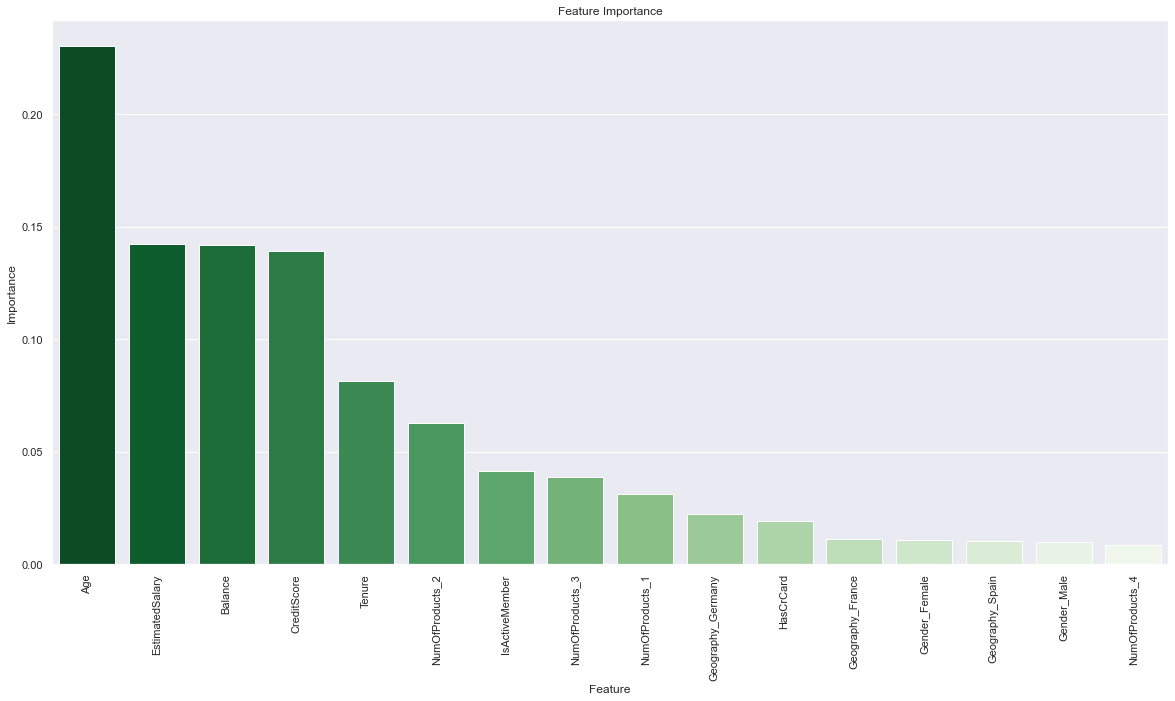

In [198]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Feature Name',y='Importance',data=Feature,palette='Greens_r')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90);

# Conculsion

The key factors that significantly influence the deactivation of customers banking facilities are Total_Products, Age, IsActiveMember, Gender and Geography.

High Training and Testing Accuracies: Both the model achieved a high accuracy score near to 90% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score near to 85% on the testing data suggests its ability to generalize well to unseen instances.

High F1 Score, Recall, and Precision: The Decision Tree model achieved high F1 score, recall, and precision values, all approximately 0.8. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.

# Future updation:

The bank can try to convince the customers to have atleast 2 banking products but not less than 2.

The bank can launch a scheme for customers with higher ages (Senior Citizens) so that they not deactivate their banking facilities.

The bank can provide Rewards and Incentive Programs, Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.